## INCOME PREDICTION
Name: Deependra Singh Sinsinwar
Roll Number: 19097
Department: EECS
Course: DSE 308

# Reading files

In [ ]:
#importing both train data and labeled dataa
import pandas as pd
df=pd.read_csv("train.csv")
y=pd.read_csv("train_class_labels.csv")
df.columns
df

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
43953,43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
43954,43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States
43955,43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States


In [ ]:
#there is an extra column of index which will interfere in the implementation of code, so we will remove it from both datasets
df.drop("Unnamed: 0",axis=1, inplace=True)
y.drop("Unnamed: 0",axis=1, inplace=True)

import warnings
warnings.filterwarnings("ignore")

# Visualization

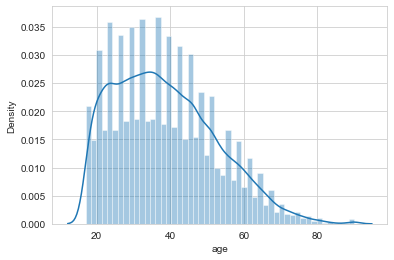

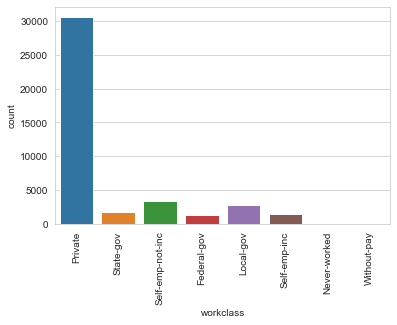

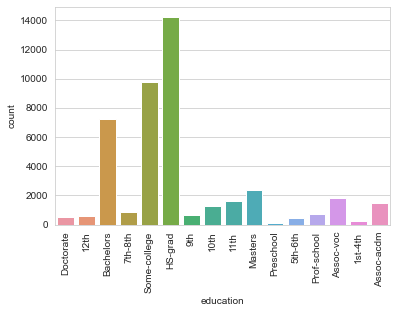

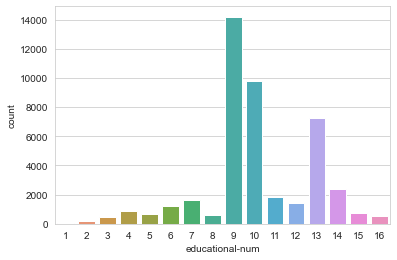

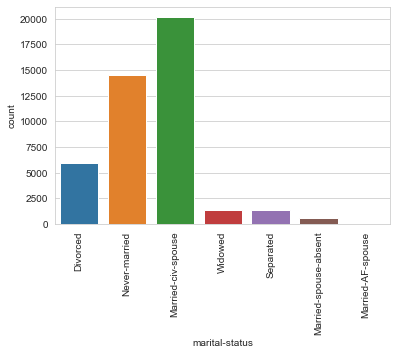

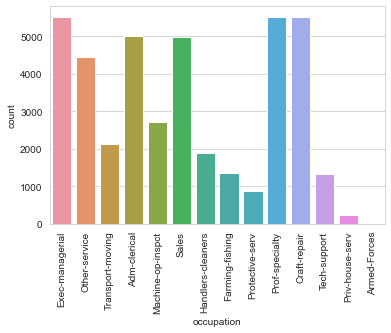

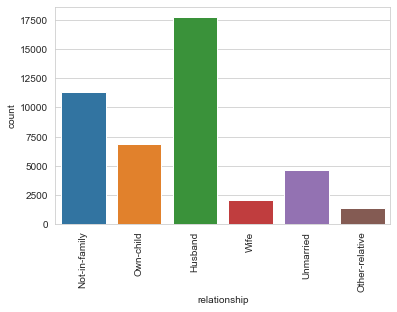

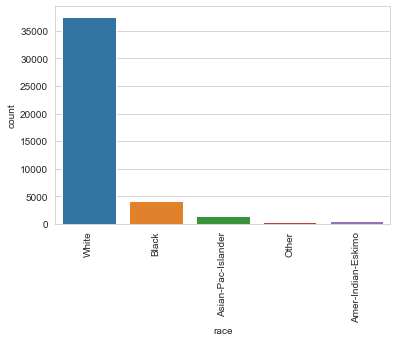

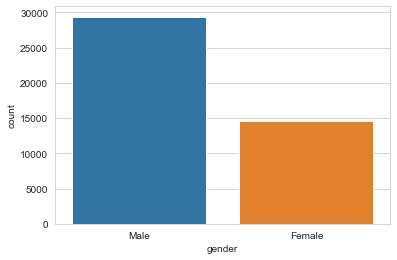

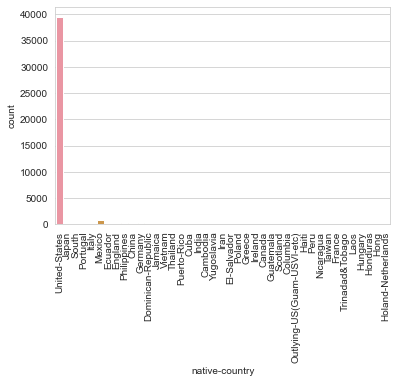

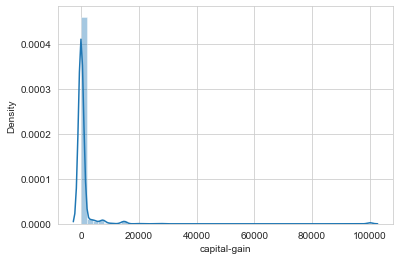

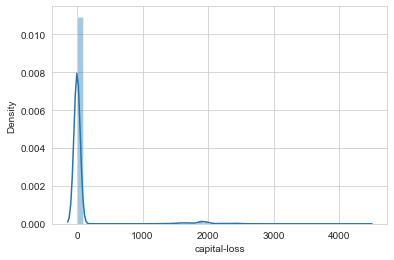

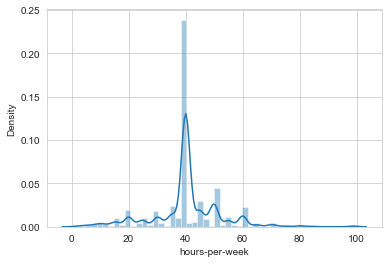

In [ ]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt



#i have tried various plotting techniques for this particular but none seems to fit due to huge variance, after searching on google i came up with distplot
# count plot on single categorical variable
#sns.countplot(x ='age', data=df, )
sns.set_style('whitegrid')
sns.distplot(df["age"])
plt.show()
# Show the plot
#plt.tight_layout()
#plt.show()

print("\n");
sns.countplot(x ='workclass', data=df, )
plt.xticks(rotation=90)
plt.show()



print("\n");
sns.countplot(x ='education', data=df, )
plt.xticks(rotation=90)
plt.show()


print("\n");
sns.countplot(x ='educational-num', data=df, )
#plt.xticks(rotation=90)
plt.show()


print("\n");
sns.countplot(x ='marital-status', data=df, )
plt.xticks(rotation=90)
plt.show()


print("\n");
sns.countplot(x ='occupation', data=df, )
plt.xticks(rotation=90)
plt.show()


print("\n");
sns.countplot(x ='relationship', data=df, )
plt.xticks(rotation=90)
plt.show()


print("\n");
sns.countplot(x ='race', data=df, )
plt.xticks(rotation=90)
plt.show()


print("\n");
sns.countplot(x ='gender', data=df, )
#plt.xticks(rotation=90)
plt.show()



print("\n");
sns.countplot(x ='native-country', data=df, )
plt.xticks(rotation=90)
plt.show()

print("\n")
sns.set_style('whitegrid')
sns.distplot(df['capital-gain'])
plt.show()

print("\n")
sns.set_style('whitegrid')
sns.distplot(df['capital-loss'])
plt.show()

print("\n")
sns.set_style('whitegrid')
sns.distplot(df['hours-per-week'])
plt.show()



<AxesSubplot:>

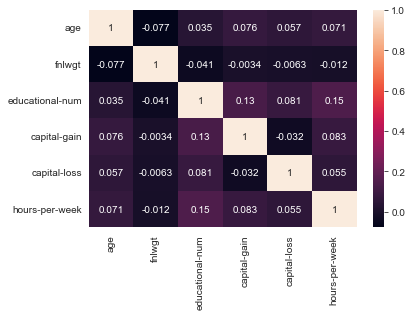

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

# Finding number of missing values 

In [ ]:
#we know the total number of rows are 43957 and by looking at the info we can say how many features have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.7+ MB


# Reading the Columns with Missing Values



In [ ]:
# As you can see in above displayed data, there are only 3 columns with any sort of null values which are: 
# workclass, occupation and native-country, we only need to treat them
df.workclass.value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [ ]:
df.occupation.value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [ ]:
df["native-country"].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

# Skewing the data

In [ ]:
df.skew()

age                 0.559838
fnlwgt              1.459951
educational-num    -0.318839
capital-gain       11.760659
capital-loss        4.546897
hours-per-week      0.238426
dtype: float64

# Treating missing values

In [ ]:
df["workclass"]=df["workclass"].fillna("Private")
df["occupation"]=df["occupation"].fillna("Craft-repair")
df["native-country"]=df["native-country"].fillna("United-States")

# Reading the treated columns 

In [ ]:
print(df.workclass.value_counts())
print("\n\n")
print(df.occupation.value_counts())
print("\n\n")
print(df["native-country"].value_counts())

Private             33085
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64



Craft-repair         8025
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64



United-States                 40192
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
E

# Encoding Data

In [ ]:
#my dataset has both categorical and numerical data, i need to encode categorical data to apply models to it
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Labenc=LabelEncoder()
df["workclass"]=Labenc.fit_transform(df["workclass"])
df["education"]=Labenc.fit_transform(df["education"])
df["marital-status"]=Labenc.fit_transform(df["marital-status"])
df["occupation"]=Labenc.fit_transform(df["occupation"])
df["relationship"]=Labenc.fit_transform(df["relationship"])
df["race"]=Labenc.fit_transform(df["race"])
df["gender"]=Labenc.fit_transform(df["gender"])
df["native-country"]=Labenc.fit_transform(df["native-country"])


# Scaling the Data

In [ ]:
#for making data points generalized so that the distance between them will be lower
from sklearn.preprocessing import StandardScaler
dataset=StandardScaler().fit_transform(df)
x=pd.DataFrame(dataset,columns=df.columns)


# Model Fitting


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gnb=GaussianNB()
knn=KNeighborsClassifier()
lg=LogisticRegression()
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
gbc=GradientBoostingClassifier()
adbc=AdaBoostClassifier()
svc=SVC()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5, random_state=11)
for i in [gnb,knn,lg,rfc,dt,gbc,adbc,svc]:
    i.fit(X_train,Y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(Y_test,pred)
    train_score=accuracy_score(Y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for test data",accuracy_score(Y_test,pred))
    print("Accuracy Score for train data", accuracy_score(Y_train,i.predict(X_train)))
    print(classification_report(Y_test,pred))
    print(confusion_matrix(Y_test,pred))
    print("----------------------------------------")


GaussianNB()
Accuracy Score for test data 0.8057236452977843
Accuracy Score for train data 0.8085358085358085
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     16691
           1       0.69      0.35      0.46      5288

    accuracy                           0.81     21979
   macro avg       0.76      0.65      0.67     21979
weighted avg       0.79      0.81      0.78     21979

[[15857   834]
 [ 3436  1852]]
----------------------------------------
KNeighborsClassifier()
Accuracy Score for test data 0.823831839483143
Accuracy Score for train data 0.8830648830648831
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     16691
           1       0.65      0.57      0.61      5288

    accuracy                           0.82     21979
   macro avg       0.76      0.74      0.75     21979
weighted avg       0.82      0.82      0.82     21979

[[15101  1590]
 [ 2282  3006]]
--------------

# Hyper Parameter tuning

# Tuning GaussianNB()


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
Naive_parameters = {'var_smoothing': np.logspace(0,-9,num = 1000)}
Naivegrid = GridSearchCV(estimator = gnb, param_grid =Naive_parameters, cv=10, scoring ='f1_macro' )
Naive_tuned = gnb.fit(X_train,Y_train)
Y_Naive_predict = Naive_tuned.predict(X_test)



Naivegrid.fit(X_train, Y_train)
print("Naive_Bayes()")
print("Accuracy Score for Naive_Bayes",str(accuracy_score(Y_test,Y_Naive_predict)))
print(confusion_matrix(Y_test,Y_Naive_predict))
print(classification_report(Y_test, Y_Naive_predict))

Naive_Bayes()
Accuracy Score for Naive_Bayes 0.8057236452977843
[[15857   834]
 [ 3436  1852]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     16691
           1       0.69      0.35      0.46      5288

    accuracy                           0.81     21979
   macro avg       0.76      0.65      0.67     21979
weighted avg       0.79      0.81      0.78     21979



In [ ]:
Naivegrid.best_estimator_

GaussianNB(var_smoothing=0.05366976945540476)

In [ ]:
tuned_nb=GaussianNB(var_smoothing=0.05366976945540476)

tuned_nb.fit(X_train, Y_train)
Y_Naive_predict_final = tuned_nb.predict(X_test)

print("Naive_Bayes()")
print("Accuracy Score for Naive_Bayes",str(accuracy_score(Y_test,Y_Naive_predict_final)))
print(confusion_matrix(Y_test,Y_Naive_predict_final))
print(classification_report(Y_test, Y_Naive_predict_final))

Naive_Bayes()
Accuracy Score for Naive_Bayes 0.8170526411574685
[[15950   741]
 [ 3280  2008]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16691
           1       0.73      0.38      0.50      5288

    accuracy                           0.82     21979
   macro avg       0.78      0.67      0.69     21979
weighted avg       0.81      0.82      0.79     21979



# Tuning KNeighborsClassifier()


In [ ]:

KNN_parameters = {'n_neighbors': [1,2,5,7,9,11,18,30], 'leaf_size': [1,2,5,10,20,30], 'p': (1,2), 'weights':('uniform','distance'), 'metric':('minkowski','chebyshev')}
KNN_grid = GridSearchCV(KNeighborsClassifier(), KNN_parameters, verbose = 1, cv=10, scoring = 'f1_macro')
KNN_tuned = KNN_grid.fit(X_train,Y_train)
Y_KNN_predict = KNN_tuned.predict(X_test)
print("Tuned_KNN_Model()")
print("Accuracy Score for KNN model",str(accuracy_score(Y_test,Y_KNN_predict)))
print(confusion_matrix(Y_test,Y_KNN_predict))
print(classification_report(Y_test,Y_KNN_predict))

In [ ]:
KNN_grid.best_estimator_

In [ ]:
tuned_knn=KNeighborsClassifier(leaf_size=1, n_neighbors=30, p=1, weights='distance')
tuned_knn.fit(X_train, Y_train)
Y_KNN_predict_final = tuned_knn.predict(X_test)

print("KNN()")
print("Accuracy Score for KNN",str(accuracy_score(Y_test,Y_KNN_predict_final)))
print(confusion_matrix(Y_test,Y_KNN_predict_final))
print(classification_report(Y_test, Y_KNN_predict_final))

KNN()
Accuracy Score for KNN 0.8373447381591519
[[15402  1289]
 [ 2286  3002]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     16691
           1       0.70      0.57      0.63      5288

    accuracy                           0.84     21979
   macro avg       0.79      0.75      0.76     21979
weighted avg       0.83      0.84      0.83     21979



# Tuning LogisticRegression()



In [ ]:
lg_parameters = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
lg_grid = GridSearchCV(lg, param_grid = lg_parameters, scoring = 'accuracy')
lg_grid.fit(X_train, Y_train)
Y_lg_predict = lg_grid.predict(X_test)

print("Tuned_Logistic_regression()")
print("Accuracy Score for Logistic Regression",str(accuracy_score(Y_test,Y_lg_predict)))
print(classification_report(Y_test,Y_lg_predict))
print(confusion_matrix(Y_test,Y_lg_predict))

In [ ]:
lg_grid.best_estimator_

In [ ]:
tuned_lg=LogisticRegression(C=0.1)
tuned_lg.fit(X_train, Y_train)
Y_lg_predict_final = tuned_lg.predict(X_test)

print("lg()")
print("Accuracy Score for lg",str(accuracy_score(Y_test,Y_lg_predict_final)))
print(confusion_matrix(Y_test,Y_lg_predict_final))
print(classification_report(Y_test, Y_lg_predict_final))

lg()
Accuracy Score for lg 0.820055507529915
[[15667  1024]
 [ 2931  2357]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     16691
           1       0.70      0.45      0.54      5288

    accuracy                           0.82     21979
   macro avg       0.77      0.69      0.72     21979
weighted avg       0.81      0.82      0.81     21979



# Tuning RandomForestClassifier()


In [ ]:
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
random_parameters = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4, 10],
               'bootstrap': [True, False]}
random_grid = GridSearchCV(estimator = rfc, param_grid = random_parameters, cv=10, scoring ='f1_macro' )
random_tuned = rfc.fit(X_train,Y_train)
Y_random_predict = random_tuned.predict(X_test)



random_grid.fit(X_train, Y_train)
print("Random_forest_classifier()")
print("Accuracy Score for Random_forest_Classifier",str(accuracy_score(Y_test,Y_random_predict)))
print(confusion_matrix(Y_test,Y_random_predict))
print(classification_report(Y_test, Y_random_predict))

In [ ]:
random_grid.best_estimator_

In [ ]:
tuned_random
tuned_random.fit(X_train, Y_train)
Y_random_predict_final = tuned_random.predict(X_test)

print("Random_forest_classifier()")
print("Accuracy Score for Random Forest Classifier",str(accuracy_score(Y_test,Y_Naive_predict_final)))
print(confusion_matrix(Y_test,Y_random_predict_final))
print(classification_report(Y_test, Y_random_predict_final))

# Tuning DecisionTreeClassifier()

In [ ]:
dt_parameters={'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }
dt_grid = GridSearchCV(dt, param_grid = dt_parameters, scoring = 'accuracy')
dt_grid.fit(X_train, Y_train)
Y_dt_predict = dt_grid.predict(X_test)

print("Tuned_Decision Tree_Classifier")
print("Accuracy Score for Decision Tree",str(accuracy_score(Y_test,Y_dt_predict)))
print(classification_report(Y_test,Y_dt_predict))
print(confusion_matrix(Y_test,Y_dt_predict))

Tuned_Decision Tree_Classifier
Accuracy Score for Decision Tree 0.8416670458164611
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16691
           1       0.75      0.51      0.61      5288

    accuracy                           0.84     21979
   macro avg       0.81      0.73      0.75     21979
weighted avg       0.83      0.84      0.83     21979

[[15810   881]
 [ 2599  2689]]


In [ ]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=4)

In [ ]:
tuned_dt=DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=4)
tuned_dt.fit(X_train, Y_train)
Y_dt_predict_final = tuned_dt.predict(X_test)

print("dt()")
print("Final Accuracy Score for dt",str(accuracy_score(Y_test,Y_dt_predict_final)))
print(confusion_matrix(Y_test,Y_dt_predict_final))
print(classification_report(Y_test, Y_dt_predict_final))

dt()
Final Accuracy Score for dt 0.8422585194958825
[[15604  1087]
 [ 2380  2908]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16691
           1       0.73      0.55      0.63      5288

    accuracy                           0.84     21979
   macro avg       0.80      0.74      0.76     21979
weighted avg       0.83      0.84      0.83     21979



# Tuning GradientBoostingClassifier()



In [ ]:
grid.best_estimator_

In [ ]:
tuned_gbc=GradientBoostingClassifier(max_depth=6, min_samples_leaf=20)
tuned_gbc.fit(X_train, Y_train)
Y_gbc_predict_final = tuned_gbc.predict(X_test)

print("gbc()")
print("Final Accuracy Score for gbc",str(accuracy_score(Y_test,Y_gbc_predict_final)))
print(confusion_matrix(Y_test,Y_gbc_predict_final))
print(classification_report(Y_test, Y_gbc_predict_final))

gbc()
Final Accuracy Score for gbc 0.8717867054916056
[[15742   949]
 [ 1869  3419]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     16691
           1       0.78      0.65      0.71      5288

    accuracy                           0.87     21979
   macro avg       0.84      0.79      0.81     21979
weighted avg       0.87      0.87      0.87     21979



# Tuning SVC()


In [ ]:
svc_param = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid=svc_param, scoring = 'accuracy')
svc_grid.fit(X_train, Y_train)
Y_svc_predict = svc_grid.predict(X_test)

print("SVC")
print("Accuracy Score for SVC",str(accuracy_score(Y_test,Y_svc_predict)))
print(classification_report(Y_test,Y_svc_predict))
print(confusion_matrix(Y_test,Y_svc_predict))


SVC
Accuracy Score for SVC 0.847217798807953
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     16691
           1       0.75      0.54      0.63      5288

    accuracy                           0.85     21979
   macro avg       0.81      0.74      0.77     21979
weighted avg       0.84      0.85      0.84     21979

[[15758   933]
 [ 2425  2863]]


In [ ]:
svc_grid.best_estimator_

SVC(C=1, gamma=0.1)

In [ ]:
tuned_dt=SVC(C=1, gamma=0.1)
tuned_svc.fit(X_train, Y_train)
Y_svc_predict_final = tuned_svc.predict(X_test)

print("SVC()")
print("Finl Accuracy Score for svc",str(accuracy_score(Y_test,Y_svc_predict_final)))
print(confusion_matrix(Y_test,Y_svc_predict_final))
print(classification_report(Y_test, Y_svc_predict_final))

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
for i in tqdm(range(2,9)):
    cv=cross_val_score(tuned_gbc, x, y, cv=i)
    print(cv)

 14%|████████████                                                                        | 1/7 [00:08<00:52,  8.71s/it]

[0.87105874 0.87414687]


 29%|████████████████████████                                                            | 2/7 [00:25<01:06, 13.37s/it]

[0.87176687 0.87421512 0.87585313]


 43%|████████████████████████████████████                                                | 3/7 [00:50<01:14, 18.68s/it]

[0.87070064 0.87232687 0.87496587 0.87705888]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:23<01:13, 24.46s/it]

[0.86976797 0.87397634 0.87305198 0.87794335 0.87714708]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [02:05<01:01, 30.83s/it]

[0.8657022  0.87933388 0.87141687 0.87742288 0.87291837 0.88028938]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [02:59<00:38, 38.54s/it]

[0.86401274 0.87898089 0.87627389 0.87308917 0.87275044 0.87991718
 0.87673196]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:00<00:00, 34.35s/it]

[0.8644222  0.87898089 0.87479527 0.87024568 0.88043676 0.87368038
 0.88023298 0.87404441]


In [ ]:
dff= pd.read_csv("test.csv")
test = pd.read_csv("test.csv")
#my dataset has both categorical and numerical data, i need to encode categorical data to apply models to it
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Labenc=LabelEncoder()
dff["workclass"]=Labenc.fit_transform(dff["workclass"])
dff["education"]=Labenc.fit_transform(dff["education"])
dff["marital-status"]=Labenc.fit_transform(dff["marital-status"])
dff["occupation"]=Labenc.fit_transform(dff["occupation"])
dff["relationship"]=Labenc.fit_transform(dff["relationship"])
dff["race"]=Labenc.fit_transform(dff["race"])
dff["gender"]=Labenc.fit_transform(dff["gender"])
dff["native-country"]=Labenc.fit_transform(dff["native-country"])

Y_final_predict = tuned_gbc.predict(dff)

In [ ]:
test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


In [ ]:
test['Income']=Y_final_predict
test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal,0
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States,0
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,0
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,0
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,0
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,0
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,0


In [ ]:
test.to_csv("Deependra_Singh_predicted_test.txt", index=None)